##### Choosing a setup

<a href="https://colab.research.google.com/github/rahil1303/dmt-assignment1-2025/blob/main/notebooks/Iteration_1_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [971]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
from scipy import stats

In [972]:
# Step 1: Clone the repo
#!git clone https://github.com/rahil1303/dmt-assignment1-2025.git

# Step 2: Change directory to your repo
#%cd dmt-assignment1-2025

# Step 3: Install dependencies (optional)
#!pip install -r requirements.txt

# Using locally:
#os.chdir('dmt-assignment1-2025')
#os.chdir('..')
os.getcwd()

'/home/ivanka/data-mining/dmt-assignment1-2025'

In [973]:
df = pd.read_excel("data/ODI-2025.xlsx")

In [974]:
df

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,2025-04-01 12:17:06.560,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee
2,2025-04-01 12:17:16.917,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol
3,2025-04-01 12:17:20.718,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun
4,2025-04-01 12:17:23.836,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-
5,2025-04-01 12:17:25.733,Econometrics,no,unknown,mu,nee,gender fluid,not willing to say,Tomorrow,467,99.7,8,0,5am,Chocolate,Bitterballen
6,2025-04-01 12:17:26.001,Econometrics,no,0,mu,ja,female,yes,25/10/1999,500,60,4,4,12:00,Sun,Good food
7,2025-04-01 12:17:26.930,computer science,yes,0,sigma,ja,male,not willing to say,1 april,400,30,1,6656678,12am,good food,good grade
8,2025-04-01 12:17:27.795,Masters in AI,no,0,mu,ja,female,yes,29/01/2001,500,60,3,888,10:37,Sun1,Sun2
9,2025-04-01 12:17:29.888,Ms cs,no,0,mu,ja,gender fluid,not willing to say,01082000,200,70,1,420420420420420420,0200,Work done good,Then smoke weed


##### Setup for data changes

<small> This will make sure Pandas never changes data types silently, so conversions have to be handeled manually if needed.

In [975]:
pd.set_option('future.no_silent_downcasting', True)

### Understanding the dataset

In [976]:
print("\n=============== DataFrame Info ===============")
print(df.info())

print("\n=============== Descriptive Statistics ===============")
print(df.describe())

print("\n=============== Size of the dataset: number of rows and columns ===============")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n=============== Column Names ===============")
print(df.columns)

print("\n=============== Number of Unique Values Per Column ===============")
print(df.nunique())

print("\n=============== Number of Unique Values Per Rows ===============")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


=============== DataFrame Info ===============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Tijdstempel                                                        245 non-null    datetime64[ns]
 1   What programme are you in?                                         245 non-null    object        
 2   Have you taken a course on machine learning?                       245 non-null    object        
 3   Have you taken a course on information retrieval?                  245 non-null    object        
 4   Have you taken a course on statistics?                             245 non-null    object        
 5   Have you taken a course on databases?                              245 non-null    object        
 6   What is your gende

#### Step 1: Rename columns for clarity 
The original dataset had long and inconsistent column names, including survey question text. To make the dataset easier to work with and improve readability in our code, I renamed the columns to concise names.

In [977]:
# rename columns
df = df.rename(columns={
    'Tijdstempel':'TIMESTAMP',
    'What programme are you in?': 'PROGRAM',
    'Have you taken a course on machine learning?': 'ML_COURSE',
    'Have you taken a course on information retrieval?': 'IR_COURSE',
    'Have you taken a course on statistics?': 'STAT_COURSE',
    'Have you taken a course on databases?': 'DB_COURSE',
    'What is your gender?':'GENDER',
    'I have used ChatGPT to help me with some of my study assignments ': 'CHATGPT_USAGE',
    'When is your birthday (date)?': 'BIRTHDAY',
    'How many students do you estimate there are in the room?': 'ROOM_ESTIMATE',
    'What is your stress level (0-100)?': 'STRESS_LEVEL',
    'How many hours per week do you do sports (in whole hours)? ': 'SPORTS_HOURS',
    'Give a random number': 'RANDOM_NUMBER',
    'Time you went to bed Yesterday': 'BEDTIME',
    'What makes a good day for you (1)?': 'GOOD_DAY_1',
    'What makes a good day for you (2)?': 'GOOD_DAY_2'
})

In [978]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
0,2025-04-01 12:17:06.560,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee
2,2025-04-01 12:17:16.917,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol
3,2025-04-01 12:17:20.718,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun
4,2025-04-01 12:17:23.836,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-


##### Step 2: Standardizing program names

In [979]:
df["PROGRAM"].value_counts()

PROGRAM
AI                                                                      33
Artificial Intelligence                                                 10
Computer Science                                                         9
Master AI                                                                9
Computational Science                                                    8
Econometrics                                                             8
Artificial Intelligence                                                  7
CS                                                                       6
Business Analytics                                                       6
Bioinformatics                                                           5
Computer science                                                         4
computer science                                                         3
Econometrics and Data Science                                            3
MSc Bioinformatic

In [980]:
# Clean and categorize the PROGRAM entries
def standardize_program(program):
    if pd.isna(program):
        return program

    program = str(program).lower()

    if re.search(r'\b(artificial|ai|intelligence)\b', program):
        return 'Artificial Intelligence'
    elif re.search(r'\b(computer science|cs|security|big|green)\b', program):
        return 'Computer Science'
    elif re.search(r'\bcomputational science\b', program):
        return 'Computational Science'
    elif re.search(r'\beconometrics\b', program):
        return 'Econometrics and Operations Research'
    elif re.search(r'\b(bioinformatics|bioinfomatics|biosb)\b', program):
        return 'Bioinformatics and Systems Biology'
    elif re.search(r'\bbusiness\b', program):
        return 'Business Analytics'
    elif re.search(r'\bfinance\b', program):
        return 'Finance and Technology'
    elif re.search(r'\bhuman|humanities\b', program):
        return 'Humanities Research'
    elif re.search(r'\bhealth\b', program):
        return 'Health Sciences'
    elif re.search(r'\bbiomedical\b', program):
        return 'Biomedical Sciences'
    elif re.search(r'\bfintech\b', program):
        return 'Fintech and Regulation'
    elif program in [
        "npn", "comp sci", "eor", "master", "ba"
    ]:
        return 'OTHER'
    else:
        return program.title()  # optional: title case for readability

# Apply once
df['PROGRAM'] = df['PROGRAM'].apply(standardize_program)


In [981]:
df["PROGRAM"].value_counts()

PROGRAM
Artificial Intelligence                                  100
Computer Science                                          50
Econometrics and Operations Research                      23
Bioinformatics and Systems Biology                        20
Computational Science                                     17
Business Analytics                                        16
Finance and Technology                                     6
OTHER                                                      5
Humanities Research                                        3
Health Sciences                                            1
Mathematics                                                1
Biomedical Sciences                                        1
Fintech and Regulation                                     1
B-123456789():;,.?-€/&@„_<|>#,{%^*+=•£$$< \N\+2332‘Mm      1
Name: count, dtype: int64

<small>**Note:** There is one entry in the PROGRAM column that appears to be corrupted. The row may still contain useful responses in other columns. For now, this instance is retained and categorized under OTHER to preserve potentially valuable information.

In [982]:
df.loc[df.tail(1).index, 'PROGRAM'] = 'OTHER'  # For the last entry

In [983]:
df.tail(1)

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2
244,2025-04-01 12:29:46.856,OTHER,unknown,0,sigma,nee,intersex,no,"/U+200B/-1/-0/-0.0f/-0,0d Long int 12-0/:0;",-1,2147483649999999999,2149483649,9999999999999999999998899888888888777778889999...,0 AD,()€€€€& ../rm -rf ~/* hdhdhdh,Alcohol


In [984]:
df['PROGRAM'].value_counts()

PROGRAM
Artificial Intelligence                 100
Computer Science                         50
Econometrics and Operations Research     23
Bioinformatics and Systems Biology       20
Computational Science                    17
Business Analytics                       16
OTHER                                     6
Finance and Technology                    6
Humanities Research                       3
Health Sciences                           1
Mathematics                               1
Biomedical Sciences                       1
Fintech and Regulation                    1
Name: count, dtype: int64

PROBLEM:

<small> There are corrupted values in the last instance, under `BIRTHDAY` and `GOOD_DAY_1`

##### Step 3: creating numerical values for courses

<small> Categorical values to numerical values for the following columns:
- **ML_COURSE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN
- **IR_COURSE**: `1` → 1, `0` → 0, `'unknown'` → NaN
- **DB_COURSE**: `'ja'` → 1, `'nee'` → 0, `'unknown'` → NaN
- **CHATGPT_USAGE**: `'yes'` → 1, `'no'` → 0, `'unknown'` → NaN

These mappings are stored in new columns (`_NUM`) as nullable integers (`Int64`).

In [985]:
df["STAT_COURSE"].value_counts()

STAT_COURSE
mu         170
sigma       46
unknown     29
Name: count, dtype: int64

In [986]:
# Mapping dictionary for each column and their corresponding transformations
mapping_dict = {
    'ML_COURSE': {'yes': 1, 'no': 0, 'unknown': np.nan},
    'IR_COURSE': {1: 1, 0: 0, 'unknown': np.nan},
    'DB_COURSE': {'ja': 1, 'nee': 0, 'unknown': np.nan},
    'CHATGPT_USAGE': {'yes': 1, 'no': 0, 'unknown': np.nan}, 
}

# Apply mappings and convert to 'Int64' for numerical columns where applicable
df['ML_COURSE_NUM'] = df['ML_COURSE'].map(mapping_dict['ML_COURSE']).astype('Int64')
df['IR_COURSE_NUM'] = df['IR_COURSE'].map(mapping_dict['IR_COURSE']).astype('Int64')
df['DB_COURSE_NUM'] = df['DB_COURSE'].map(mapping_dict['DB_COURSE']).astype('Int64')
df['CHATGPT_USAGE_NUM'] = df['CHATGPT_USAGE'].map(mapping_dict['CHATGPT_USAGE']).astype('Int64')

In [987]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,STRESS_LEVEL,SPORTS_HOURS,RANDOM_NUMBER,BEDTIME,GOOD_DAY_1,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel,1,<NA>,1,1
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31416,12:30,sun,coffee,1,1,1,1
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol,1,1,1,<NA>
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun,1,0,0,1
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-,1,1,1,1


##### Step 4: categorizing gender

In [988]:
df["GENDER"].value_counts()

GENDER
male                     137
female                    89
not willing to answer      9
gender fluid               4
intersex                   4
non-binary                 1
other                      1
Name: count, dtype: int64

<small> The `categorize_gender` function maps known gender values (`'male'`, `'female'`, `'not willing to answer'`) directly, while grouping all other values into the category `'gender_non_conforming'`. *Reasons: reducing the number of groups, making less-represented genders more visible, and promoting pseudonymization*

In [989]:
def categorize_gender(value):
    # Direct mapping for known values
    gender_map = {
        'male': 'male',
        'female': 'female',
        'not willing to answer': 'unknown'
    }
    
    # Apply map for known values, otherwise classify as 'gender_non_conforming'
    return gender_map.get(value, 'gender_non_conforming')

# Apply to the 'GENDER' column and save in 'GENDER_CATEGORIZED'
df['GENDER_CATEGORIZED'] = df['GENDER'].apply(categorize_gender)

In [990]:
df["GENDER_CATEGORIZED"].value_counts()

GENDER_CATEGORIZED
male                     137
female                    89
gender_non_conforming     10
unknown                    9
Name: count, dtype: int64

#### Step 5: room estimate

In [991]:
df["ROOM_ESTIMATE"].unique()

array([400, 321, 200, 350, 500, 467, 250, 345, 300, 100, 550, '180-200',
       456, '20*5*5', 487, 490, 450, 600, 320, 150, 375, 187, 80, 220,
       430, 380, 5, 330, 385, 390, 195, 234, 480, 291, 420, 289, 70000,
       425, 287, 483, 'approx 300', 240, 357, 297, 366, 123, '300ish?',
       125, 378, 'Around 200', 280, 230, 118, 'Idk', 460, 340, 384, 9000,
       311, 253, -9999, 180, 458, 210, 10000, 387, 520, -3, -1],
      dtype=object)

<small> The `ROOM_ESTIMATE_CLEANED` column replaces irregular or ambiguous room estimate entries with standardized numerical values. *Reasons: consistency and handling unknown values as NaN.*

In [992]:
df['ROOM_ESTIMATE_CLEANED'] = df['ROOM_ESTIMATE'].replace({
    '180-200': 190,
    '20*5*5': 500,
    'approx 300': 300,
    '300ish?': 300,
    'Around 200': 200,
    'Idk': np.nan
})

In [993]:
df["ROOM_ESTIMATE_CLEANED"] = df["ROOM_ESTIMATE_CLEANED"].astype('Int64')
df["ROOM_ESTIMATE_CLEANED"].unique()

<IntegerArray>
[  400,   321,   200,   350,   500,   467,   250,   345,   300,   100,   550,
   190,   456,   487,   490,   450,   600,   320,   150,   375,   187,    80,
   220,   430,   380,     5,   330,   385,   390,   195,   234,   480,   291,
   420,   289, 70000,   425,   287,   483,   240,   357,   297,   366,   123,
   125,   378,   280,   230,   118,  <NA>,   460,   340,   384,  9000,   311,
   253, -9999,   180,   458,   210, 10000,   387,   520,    -3,    -1]
Length: 65, dtype: Int64

PROBLEM:

<small> There are still negative values or extreme over-estimations present, which will need further attention to avoid skewing analysis.

##### Step 6: stress level

In [994]:
df["STRESS_LEVEL"].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 'Over 9000', 79,
       '42.0', 85, 25, 110, 900, 22, 23, 67, 1, 69, 'π©', 7, 57, -10, 99,
       24, 87, -10000, 58, 23.23, 98, -1, 'Now? 22', 77, nan, 63, 61, 33,
       'I BELIEVE I CAN FLY', '2147483649999999999'], dtype=object)

<small> `STRESS_LEVEL` column contains the numbers students chose, just not numerical. There aren't a lot of these, so we map them into the right formatting. *NOTE: I assume 'I BELIEVE I CAN FLY' means stress level 0, but that might not be right.*

In [995]:
# Mapping non-numerical entries that contain numerical answers
stress_level_mapping = {
    'π©': 3.14,  
    'Over 9000': 9000,  
    '42.0': 42,  
    'Now? 22': 22,  
    'I BELIEVE I CAN FLY': 0,
}


def clean_stress_level(value):
    # if in dictionary, return the mapped value
    if value in stress_level_mapping:
        return stress_level_mapping[value]
    # otherwise return the original value
    return value

# Apply the cleaning
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL'].apply(clean_stress_level)


In [996]:
df['STRESS_LEVEL_CLEANED'].unique()

array([78, 1000, 101, 60, 50, 99.7, 30, 70, 100, 20, 5, 8, 9999, 15, 75,
       100000000000000, 2, 3, 55, 80, 10, 45, 89, 0, 49, 72, 6, 13, 11,
       35, 66, 90, 40, 65, 200, 42, 99999, 47, 37, 9000, 79, 85, 25, 110,
       900, 22, 23, 67, 1, 69, 3.14, 7, 57, -10, 99, 24, 87, -10000, 58,
       23.23, 98, -1, 77, nan, 63, 61, 33, '2147483649999999999'],
      dtype=object)

<small> `STRESS_LEVEL` column contains one number that is written as a string.

In [997]:
# Convert to numeric values, coercing errors to NaN
df['STRESS_LEVEL_CLEANED'] = pd.to_numeric(df['STRESS_LEVEL_CLEANED'], errors='coerce')

<small> `STRESS_LEVEL` column contains numbers out of bound 0-100 so we map anything that's lower then 0 to 0 and anything higher than 100 to 100.

In [998]:
# Cap values at 100 and set values below 0 to 0
df['STRESS_LEVEL_CLEANED'] = df['STRESS_LEVEL_CLEANED'].clip(lower=0, upper=100)

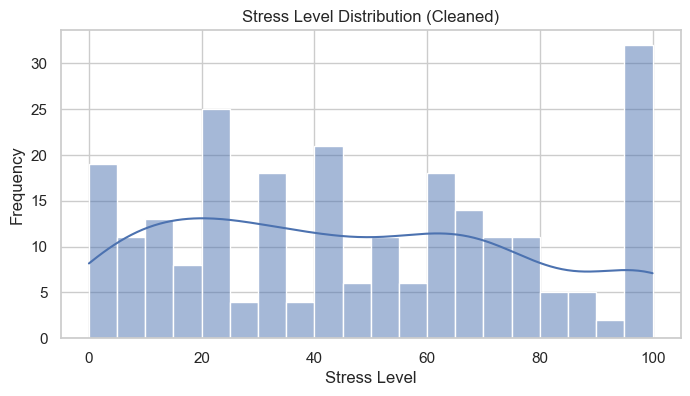

In [999]:
# Plot the cleaned column
plt.figure(figsize=(8,4))
sns.histplot(df['STRESS_LEVEL_CLEANED'].dropna(), bins=20, kde=True)
plt.title("Stress Level Distribution (Cleaned)")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


In [1000]:
df['STRESS_LEVEL_CLEANED'].value_counts()

STRESS_LEVEL_CLEANED
100.00    28
40.00     19
20.00     19
30.00     17
60.00     16
0.00      12
50.00     11
70.00     10
10.00      9
15.00      8
75.00      8
65.00      6
69.00      6
80.00      5
5.00       5
2.00       4
25.00      4
55.00      3
8.00       3
45.00      3
85.00      3
35.00      3
22.00      2
47.00      2
42.00      2
99.00      2
23.00      2
90.00      2
58.00      2
11.00      2
13.00      2
6.00       2
87.00      1
24.00      1
23.23      1
7.00       1
77.00      1
63.00      1
61.00      1
57.00      1
98.00      1
78.00      1
3.14       1
1.00       1
67.00      1
79.00      1
37.00      1
66.00      1
72.00      1
49.00      1
89.00      1
3.00       1
99.70      1
33.00      1
Name: count, dtype: int64

PROBLEM:

<small> The chart provides no information so consider a different way to represent the values, or choose different bin sizes. Right now it groups in increments of 5 (bins=20).

#### Step 7: sports hours

In [1001]:
df["SPORTS_HOURS"].unique()

array([0, 2, 4, 6, 8, 1, 3, 4.5, 7, 10, 12, '4-5', 9, 5, 69, 15, 20, 23,
       168, '4.5', '2h', '0😭😭😭', 'zero', '3-4', 16, 14, 200, 11, 4.6,
       '4.5 hours', 13, '&&&&', 2149483649], dtype=object)

<small> **Mapping known values:**
- mapping specific, inconsistent entries in the `SPORTS_HOURS` column to cleaner and standardized numeric values. For example, '4-5' becomes 4.5 (average of 4 and 5), '2h' becomes 2, and 'zero' or '0😭😭😭' becomes 0
- the column is converted to numeric values using `pd.to_numeric()` to handle any remaining non-numeric entries


In [1002]:
# Mapping specific known values to cleaned versions
replace_map = {
    '4-5': 4.5, # Average of 4 and 5
    'zero': 0,
    '0😭😭😭': 0,
    '2h': 2,
    '4.5 hours': 4.5,
    '4.5': 4.5,
    '3-4': 3.5,  # Average of 3 and 4
    '&&&&': np.nan,  # Replace unrecognizable characters with NaN
}

# replace the values in 'SPORTS_HOURS' column
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS'].replace(replace_map)

# convert values to float
df['SPORTS_HOURS_CLEANED'] = pd.to_numeric(df['SPORTS_HOURS_CLEANED'], errors='coerce')

<small> **Handling unreasonable values:**
   - A threshold of 60 hours per week is applied, as anything beyond this is considered an unrealistic entry. Any values greater than 60 are replaced with `NaN` to avoid distortions for now

In [1003]:
# the threshold for maximum possible exercise hours per week
max_exercise_hours = 60

# replace values greater than max_exercise_hours with NaN
df['SPORTS_HOURS_CLEANED'] = df['SPORTS_HOURS_CLEANED'].apply(
    lambda x: np.nan if x > max_exercise_hours else x
)

In [1004]:
df['SPORTS_HOURS_CLEANED'].unique()

array([ 0. ,  2. ,  4. ,  6. ,  8. ,  1. ,  3. ,  4.5,  7. , 10. , 12. ,
        9. ,  5. ,  nan, 15. , 20. , 23. ,  3.5, 16. , 14. , 11. ,  4.6,
       13. ])

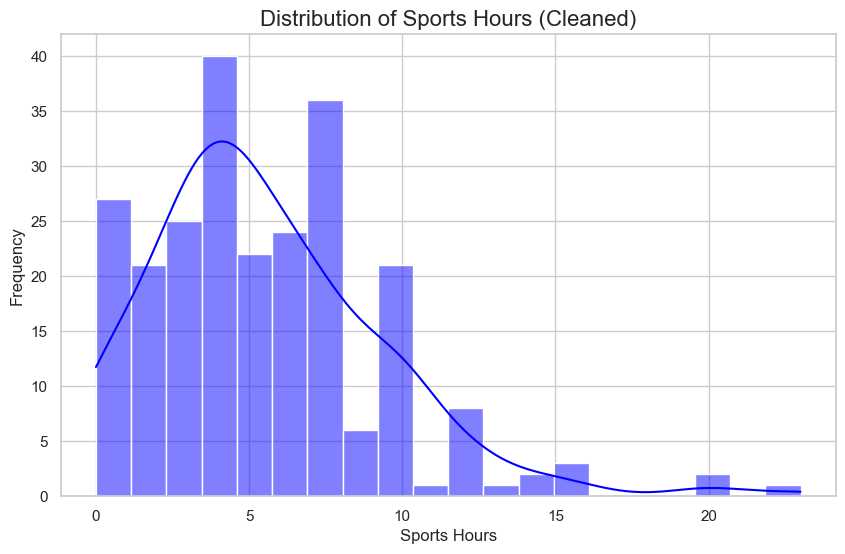

In [1005]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution of cleaned sports hours
plt.figure(figsize=(10, 6))
sns.histplot(df['SPORTS_HOURS_CLEANED'], kde=True, color="blue", bins=20)  # kde=True adds a density curve
plt.title("Distribution of Sports Hours (Cleaned)", fontsize=16)
plt.xlabel("Sports Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


PROBLEM:

<small> Inadequate graph to represent the data.

##### Step 9: random numbers

In [1006]:
df["RANDOM_NUMBER"].unique()

array([928393, 31416, 5, 37, 1, 0, 4, 6656678, 888, '420420420420420420',
       3, 538299189101, 1984, 72, 7, 94, 13, 28, 9, 8, 6372, 27, 9999, 78,
       38, 19, 777, 74, 99, 25, 108, 4738, 11011011, 87, 39,
       '77945354356758979022123', 1934, 69420, 14, 69, 420, 66,
       '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u',
       '2324234234234432434', 73, -1, 358, 42, 61, 6969696, 95836,
       'Random', 12, 47, 89, 4141, 15, 6, 168, 5347833, 7777, 77, 30, 10,
       197367, 40, 11, 9581995819194, 89867, 658, 236, 1738,
       '184365902143674301', 33, 64, 314159265359, 44, 426, 891230124,
       124, 9999999999, 67, 23, 'Ø', 81, 3737,
       '245819732157863251872726618812736168172715169485342146436918753',
       'cleanMe12', 18282, 17, 75, 46789901874822496, 31,
       'achtduizendvierhonderdvijfendertig komma zesenvijftig',
       173425111379664, 271828, 21, 1672, 823, 51, 8473, '27.4', 22,
       55678686, 90, '85828228182566372

<small> 

- **Mapping Specific Known Values:**  
  Specific, known values are mapped to clean numeric equivalents or `NaN`. For example, `‘cleanMe12’` becomes 12, and strings like `‘Ø’` or `‘Random’` or the emoji (such as `‘😅’`) are replaced with `NaN`.

- **Converting Strings to Numeric Values:**  
  The function attempts to convert any string representation of numbers (like `‘-69420’`) into actual numeric values.


In [1007]:
def clean_random_number(value):
    # Define the specific mappings
    mappings = {
        'Random': np.nan,
        'cleanMe12': 12,
        'achtduizendvierhonderdvijfendertig komma zesenvijftig': 8435.56,
        'Ø': np.nan,
        '“-69420”': -69420,
        '199389299284884742829r7747r8e9w929e94747uch38838udud8388383838e8e8e8e8e8e8d8du8s888x8d88d8u': np.nan
    }
    
    # check if it's an emoji
    if isinstance(value, str) and re.match(r'\U0001F605', value):  # Checks for '😅' emoji
        return np.nan
    
    # the value is in the mapping
    if value in mappings:
        return mappings[value]
    
    # numeric strings and other cases
    try:
        # convert to a number if possible (this will handle things like "-69420")
        return float(value)
    except ValueError:
        return value

# Apply the cleaning function to the column
df['RANDOM_NUMBER_CLEANED'] = df['RANDOM_NUMBER'].apply(clean_random_number)

In [1008]:
df["RANDOM_NUMBER_CLEANED"].unique()

array([928393.0, 31416.0, 5.0, 37.0, 1.0, 0.0, 4.0, 6656678.0, 888.0,
       4.204204204204204e+17, 3.0, 538299189101.0, 1984.0, 72.0, 7.0,
       94.0, 13.0, 28.0, 9.0, 8.0, 6372.0, 27.0, 9999.0, 78.0, 38.0, 19.0,
       777.0, 74.0, 99.0, 25.0, 108.0, 4738.0, 11011011.0, 87.0, 39.0,
       7.794535435675898e+22, 1934.0, 69420.0, 14.0, 69.0, 420.0, 66.0,
       nan, 2.3242342342344325e+18, 73.0, -1.0, 358.0, 42.0, 61.0,
       6969696.0, 95836.0, 12.0, 47.0, 89.0, 4141.0, 15.0, 6.0, 168.0,
       5347833.0, 7777.0, 77.0, 30.0, 10.0, 197367.0, 40.0, 11.0,
       9581995819194.0, 89867.0, 658.0, 236.0, 1738.0,
       1.843659021436743e+17, 33.0, 64.0, 314159265359.0, 44.0, 426.0,
       891230124.0, 124.0, 9999999999.0, 67.0, 23.0, 81.0, 3737.0,
       2.4581973215786324e+62, 18282.0, 17.0, 75.0, 4.67899018748225e+16,
       31.0, 8435.56, 173425111379664.0, 271828.0, 21.0, 1672.0, 823.0,
       51.0, 8473.0, 27.4, 22.0, 55678686.0, 90.0, 8.582822818256637e+20,
       76.0, 158.0, 1.010

In [1009]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,GOOD_DAY_2,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,Travel,1,<NA>,1,1,male,400,78.0,0.0,928393.0
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,coffee,1,1,1,1,female,321,100.0,2.0,31416.0
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,Aperol,1,1,1,<NA>,male,200,100.0,4.0,5.0
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,Sun,1,0,0,1,male,350,60.0,6.0,37.0
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,-,1,1,1,1,male,500,50.0,8.0,1.0


##### Step 10: Birthday

In [1010]:
df["BIRTHDAY"].unique()

array(['01-01-1888', '31/01/2002', 'September ', '17/10/2003',
       '19/04/2000', 'Tomorrow', '25/10/1999', '1 april', '29/01/2001',
       '01082000', '19/10/1999', '1-1-1999', '01012000', 'June 15 2001',
       '01', '27/02/2001', '10-05-1982', '16.12.1998', '23/06/2002',
       '10/08/2000', '30-12-2003', '11 August', 'Idk', '04/19/2000',
       '19/07/2003', '19 February ', '19.05.2000', 'September 14', 1999,
       '11.12.2001', '24.01.1999', '29-070-2000', '24 de Diciembre ',
       '01/06/2000', '11-11-00', '05.11.1997', '27-11-2002', '20/07/2001',
       2000, '23-12-2002', '16/03/2002', '09-05-2002', '18-05-2003',
       '11/11/2002', 26, '29th September 2001', '21-11-2002',
       'December 14th', '2001-09-16', 1997, '16-08-1996', '69.69.2069',
       '26/11/1998', '23 maart', '14-09-2000', '-', '20.05.2001',
       '28-12-1999', 'January 16th', '23-05', '19 July 1997',
       '10/12/1994', '20.06', '30/09/2002', '01-01-1900', 23, '15-02',
       '13/03/2002', '08.10.2001',


  - All values in the `BIRTHDAY` are converted to strings and any leading or trailing spaces are removed

  - `normalize_date_string`
    - converts the string to lowercase.
    - removes `st`, `nd`, `rd`, `th`
    - replaces non-English month names with English equivalents
    - standardizes delimiters

  - parse the cleaned date strings into actual datetime objects using the `parse` function from the `dateutil.parser` module
  - dictionary `fixable_mapping` is used to map these problematic values to their correct date format and apply the `pd.to_datetime` function to ensure that all valid dates are properly formatted as datetime objects.

In [1011]:
# convert everything into a string and remove spaces
df['BIRTHDAY'] = df['BIRTHDAY'].astype(str).str.strip()

In [1012]:
# normalize the strings
def normalize_date_string(val):
    val = val.lower()
    val = re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', val)  # Remove suffixes
    val = val.replace('de diciembre', 'december')
    val = val.replace('augustus', 'august')
    val = re.sub(r'[-.\s]', '/', val)  # Standardize delimiters
    return val.strip()

df['BIRTHDAY_CLEANED'] = df['BIRTHDAY'].dropna().apply(normalize_date_string)


In [1013]:
def try_parse_date(val):
    try:
        return parse(val, dayfirst=True, fuzzy=True)
    except:
        return pd.NaT

df['BIRTHDAY_CLEANED'] = df['BIRTHDAY_CLEANED'].apply(try_parse_date)


In [1014]:
fixable_mapping = {
    "01082000": "2000-08-01",
    "01012000": "2000-01-01",
    "10112000": "2000-11-10",
    "08031998": "1998-03-08",
    "05082000": "2000-08-05",
    "21052025": "2025-05-21",
    "23 maart": "2025-03-23",
    "16 juni 2001": "2001-06-16",
    "07 232001": "2001-07-23",
    "de vijftiende dag van de vierde maand": "2025-04-15",
    "24.01.":"2025-01-24",
    "29-070-2000": "2000-07-29",
}

# Replace values in BIRTHDAY_CLEANED
df.loc[df['BIRTHDAY'].isin(fixable_mapping.keys()), 'BIRTHDAY_CLEANED'] = \
    df['BIRTHDAY'].map(fixable_mapping).apply(pd.to_datetime)

In [1015]:
# compare the values
pd.set_option('display.max_rows', None)
# Create a new DataFrame with both columns for side-by-side comparison
comparison_df = pd.concat([df['BIRTHDAY'], df['BIRTHDAY_CLEANED']], axis=1)

# Rename the columns for clarity
comparison_df.columns = ['BIRTHDAY', 'BIRTHDAY_CLEANED']
nat_comparison = comparison_df[comparison_df['BIRTHDAY_CLEANED'].isna()]
nat_comparison

,BIRTHDAY,BIRTHDAY_CLEANED
5,Tomorrow,NaT
22,Idk,NaT
52,69.69.2069,NaT
56,-,NaT
81,not today,NaT
86,X,NaT
90,-,NaT
91,Lol,NaT
101,Muhahahah,NaT
118,0000,NaT


In [1016]:
df["BIRTHDAY_CLEANED"].describe()

count                              227
mean     2006-01-16 03:29:20.352422912
min                1888-01-01 00:00:00
25%                2000-08-12 12:00:00
50%                2002-02-24 00:00:00
75%                2025-01-11 00:00:00
max                2069-09-06 00:00:00
Name: BIRTHDAY_CLEANED, dtype: object

#### Additional Cleaning for Birthday

I used the `BIRTHDAY_CLEANED` column to determine which individuals provided valid birth dates and which ones did not:
1. **Age Calculation**: 
   - I calculated the person's age.
   - **Age = 0**: the individual only provided the month and day, with no year -> their birthday occurred this year
   - **Age = -1**: the individual only provided the month and day, with no year -> their birthday didn't occur this year
   - **Deep Negative Ages**: indicate an unrealistic date -> flagged as invalid
   - **Deep Positive Ages**: very high positive ages -> the provided date is also incorrect

2. **Handling Valid Ages**: for valid entries with a reasonable age, I calculated the corresponding age

3. **Handling Incomplete or Invalid Data**: 
   - for individuals where the age could not be determined but the birthday was provided, I kept the month and day, omitting the year
   - for those with no valid date or problematic entries -> no value

4. **Column Cleanup**: I dropped the original `BIRTHDAY_CLEANED` column after processing the data, but kept `AGE`, `BIRTHDAY_MONTH` and `BIRTHDAY_DAY`


In [1017]:
# Function to calculate age based on BIRTHDAY_CLEANED without adjusting the year
def calculate_age(birthday):
    if pd.isna(birthday):
        return None
    today = datetime.today()
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age

# Calculate and create a new column for age
df['AGE'] = df['BIRTHDAY_CLEANED'].apply(calculate_age)

In [1018]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,IR_COURSE_NUM,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,BIRTHDAY_CLEANED,AGE
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,<NA>,1,1,male,400,78.0,0.0,928393.0,1888-01-01,137.0
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,1,1,1,female,321,100.0,2.0,31416.0,2002-01-31,23.0
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,1,1,<NA>,male,200,100.0,4.0,5.0,2025-09-18,-1.0
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,0,0,1,male,350,60.0,6.0,37.0,2003-10-17,21.0
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,1,1,1,male,500,50.0,8.0,1.0,2000-04-19,24.0


In [1019]:
df["AGE"].value_counts()


AGE
 23.0     37
-1.0      36
 24.0     34
 22.0     32
 0.0      22
 25.0     18
 21.0     17
 26.0     11
 27.0      5
 28.0      4
 20.0      2
 90.0      1
-45.0      1
 103.0     1
 34.0      1
 137.0     1
 125.0     1
 30.0      1
 42.0      1
 33.0      1
Name: count, dtype: int64

In [1020]:
# Set age values greater than 60 or less than -1 to NaN
df.loc[(df['AGE'] > 42) | (df['AGE'] < -1), 'AGE'] = pd.NA

In [1021]:
df['BIRTHDAY_MONTH'] = df['BIRTHDAY_CLEANED'].dt.month
df['BIRTHDAY_DAY'] = df['BIRTHDAY_CLEANED'].dt.day

In [1022]:
df.loc[df['AGE'].isin([0, -1]), 'AGE'] = np.nan

In [1023]:
# Using Int64 type, which supports <NA> for missing values
df['AGE'] = df['AGE'].astype('Int64')
df['BIRTHDAY_DAY'] = df['BIRTHDAY_DAY'].astype('Int64')
df['BIRTHDAY_MONTH'] = df['BIRTHDAY_MONTH'].astype('Int64')

In [1024]:
df = df.drop("BIRTHDAY_CLEANED", axis=1)

In [1025]:
df.head()

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,DB_COURSE_NUM,CHATGPT_USAGE_NUM,GENDER_CATEGORIZED,ROOM_ESTIMATE_CLEANED,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,AGE,BIRTHDAY_MONTH,BIRTHDAY_DAY
0,2025-04-01 12:17:06.560,Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,...,1,1,male,400,78.0,0.0,928393.0,<NA>,1,1
1,2025-04-01 12:17:14.118,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,...,1,1,female,321,100.0,2.0,31416.0,23,1,31
2,2025-04-01 12:17:16.917,Econometrics and Operations Research,yes,1,mu,ja,male,not willing to say,September,200,...,1,<NA>,male,200,100.0,4.0,5.0,<NA>,9,18
3,2025-04-01 12:17:20.718,Econometrics and Operations Research,yes,0,mu,nee,male,yes,17/10/2003,350,...,0,1,male,350,60.0,6.0,37.0,21,10,17
4,2025-04-01 12:17:23.836,Bioinformatics and Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,...,1,1,male,500,50.0,8.0,1.0,24,4,19


##### Step 11: standardize time


- `"2 pm"` -> `"14:00:00"`  
- `"3am"` -> `"03:00:00"`  
- `"9"` -> `"21:00:00"` assumes PM if no AM/PM
- `"1.30"` -> `"01:30:00"`  
- if no **am/pm**:
  - 6–11 -> PM
  - 12 or 0–5 → AM
- converts times like `12am` -> `00:00:00`, and `12pm` -> `12:00:00`
- supports formats `"23:30"`, `"1.22"`, `"7"`

In [1026]:
def clean_bedtime(value):
    if pd.isnull(value):
        return np.nan

    value = str(value).strip().lower()

    match = re.match(r"(\d{1,2})(?:[:.]?(\d{2}))?\s*(am|pm)?", value)
    if not match:
        return np.nan

    hour = int(match.group(1))
    minute = int(match.group(2)) if match.group(2) else 0
    meridian = match.group(3)

    if not meridian:
        if 6 <= hour <= 11:
            meridian = 'pm'
        elif hour == 12 or hour <= 5:
            meridian = 'am'

    if meridian == 'pm' and hour != 12:
        hour += 12
    if meridian == 'am' and hour == 12:
        hour = 0

    return f"{hour:02}:{minute:02}:00"


In [1027]:
df['BEDTIME_CLEANED'] = df['BEDTIME'].apply(clean_bedtime)

In [1028]:
print(df[df['BEDTIME_CLEANED'].isna()][['BEDTIME', 'BEDTIME_CLEANED']])

             BEDTIME BEDTIME_CLEANED
114         Midnight             NaN
150  around midnight             NaN


In [1029]:
df['BEDTIME_CLEANED'] = df['BEDTIME_CLEANED'].fillna('00:00:00')


In [1030]:
# Define the list of columns you want to export
columns_to_export = [
    'TIMESTAMP',
    'PROGRAM',
    'ML_COURSE_NUM',
    'IR_COURSE_NUM',
    'STAT_COURSE',
    'DB_COURSE_NUM',
    'GENDER_CATEGORIZED',
    'CHATGPT_USAGE_NUM',
    'AGE',
    'BIRTHDAY_MONTH',
    'BIRTHDAY_DAY',
    'ROOM_ESTIMATE_CLEANED',
    'STRESS_LEVEL_CLEANED',
    'SPORTS_HOURS_CLEANED',
    'RANDOM_NUMBER_CLEANED',
    'BEDTIME_CLEANED',
    'GOOD_DAY_1',
    'GOOD_DAY_2'
]

# Export the selected columns to a CSV file
df[columns_to_export].to_csv('cleaned_data.csv', index=False)

## Current state of data

In [1031]:
# Overview of data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TIMESTAMP              245 non-null    datetime64[ns]
 1   PROGRAM                245 non-null    object        
 2   ML_COURSE              245 non-null    object        
 3   IR_COURSE              245 non-null    object        
 4   STAT_COURSE            245 non-null    object        
 5   DB_COURSE              245 non-null    object        
 6   GENDER                 245 non-null    object        
 7   CHATGPT_USAGE          245 non-null    object        
 8   BIRTHDAY               245 non-null    object        
 9   ROOM_ESTIMATE          245 non-null    object        
 10  STRESS_LEVEL           244 non-null    object        
 11  SPORTS_HOURS           245 non-null    object        
 12  RANDOM_NUMBER          245 non-null    object        
 13  BEDTI

TIMESTAMP                 0
PROGRAM                   0
ML_COURSE                 0
IR_COURSE                 0
STAT_COURSE               0
DB_COURSE                 0
GENDER                    0
CHATGPT_USAGE             0
BIRTHDAY                  0
ROOM_ESTIMATE             0
STRESS_LEVEL              1
SPORTS_HOURS              0
RANDOM_NUMBER             0
BEDTIME                   0
GOOD_DAY_1                0
GOOD_DAY_2                0
ML_COURSE_NUM             2
IR_COURSE_NUM            24
DB_COURSE_NUM             8
CHATGPT_USAGE_NUM        41
GENDER_CATEGORIZED        0
ROOM_ESTIMATE_CLEANED     1
STRESS_LEVEL_CLEANED      1
SPORTS_HOURS_CLEANED      5
RANDOM_NUMBER_CLEANED     5
AGE                      81
BIRTHDAY_MONTH           18
BIRTHDAY_DAY             18
BEDTIME_CLEANED           0
dtype: int64

## Work in progress...

## Qualitative Data

In [1032]:
print("\n================= Descriptive Statistics for GOOD_DAY_1 ===============")
print(df["GOOD_DAY_1"].describe())
print(df["GOOD_DAY_1"].unique())
print(df["GOOD_DAY_1"].value_counts(dropna=False).head(20))
df["GOOD_DAY_1_CLEAN"] = df["GOOD_DAY_1"].str.lower().str.strip()

print("\n================= Descriptive Statistics for GOOD_DAY_2 ===============")  
print(df["GOOD_DAY_2"].describe())
print(df["GOOD_DAY_2"].unique())
print(df["GOOD_DAY_2"].value_counts(dropna=False).head(20))
df["GOOD_DAY_2_CLEAN"] = df["GOOD_DAY_2"].str.lower().str.strip()


================= Descriptive Statistics for GOOD_DAY_1 ===============
count     245
unique    176
top       Sun
freq       19
Name: GOOD_DAY_1, dtype: object
['Food' 'sun' 'Zonnetje' 'Sun' '-' 'Chocolate' 'good food' 'Sun1'
 'Work done good' 'Good food ' 'Pizza' 'Good food' 'Mama’s food'
 'Good work' 'Passing courses' 'Drugs' 'Coffee' 'Nothing ' 'Passing grade'
 ' ' 'Not having EDDA exam' 'Hanging with friends in the sun' 'Sunny day'
 'dance' 'Spending time with Marc' 'Yoga' 'Alcohol' 'grade 10'
 'Socialising ' 'doing sports' 'Sports' 'Booking tickets' 'seeing friends'
 'Nice weather' 'Feeling energized' 'Bubble tea' 'No school' 'Warm'
 'Going to gym' 'Ajax winning' 'nothing to do' 'Beer ' 'A cold beer'
 'Happy' 'Good meal' 'Az winning' 'Sunny' 'Free time'
 'Sun, good food, being productive' 'Praying 5 times on time' 'Gym'
 'Getting enough sleep' 'A good day' 'Sunny weather '
 'Sunny day spent with friends ' 'Rain' 'When the sun is out'
 'Get a lot of sleep(at least 8 hours)' 'happi

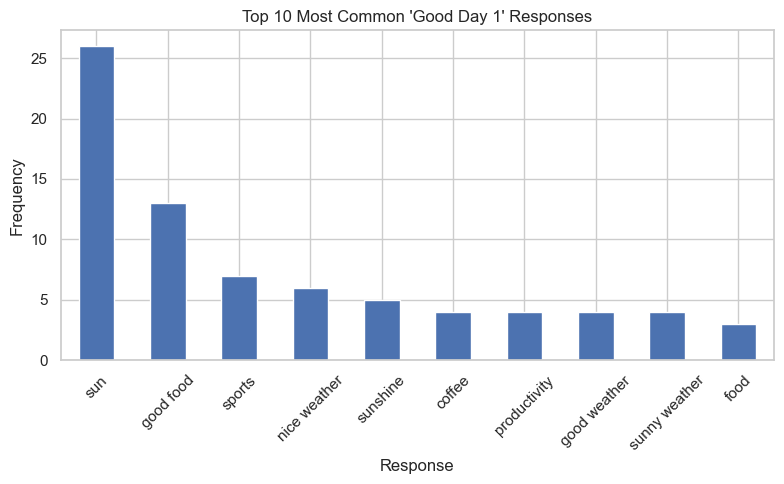

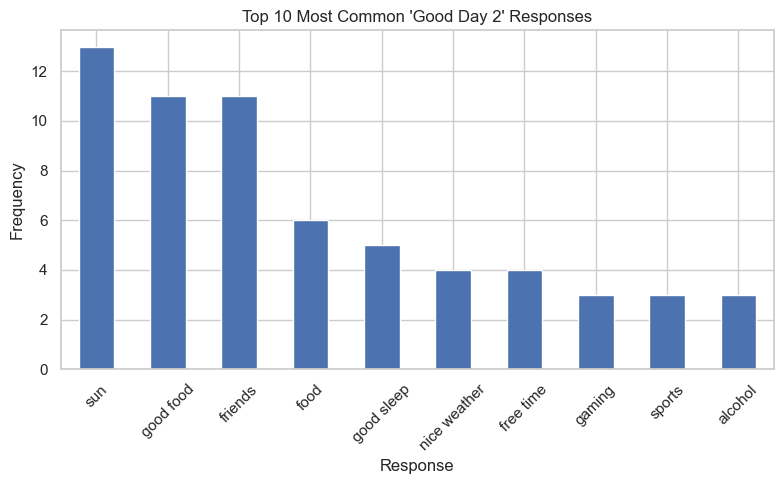

In [1033]:
df["GOOD_DAY_1_CLEAN"].value_counts().head(10).plot(kind="bar", figsize=(8, 5))
plt.title("Top 10 Most Common 'Good Day 1' Responses")
plt.ylabel("Frequency")
plt.xlabel("Response")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df["GOOD_DAY_2_CLEAN"].value_counts().head(10).plot(kind="bar", figsize=(8, 5))
plt.title("Top 10 Most Common 'Good Day 2' Responses")
plt.ylabel("Frequency")
plt.xlabel("Response")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Clean and categorize the GOOD_DAY entries
def standardize_good_day(good_day):
    if pd.isna(good_day):
        return "unknown"
    
    good_day = str(good_day).lower().strip()
    
    if any(word in good_day for word in ["sun", "zon", "weather", "zonnetje", "rain", "sunny", "cloudy", "windy", "wind","storm", "warm"]):
        return "weather"
    elif any(word in good_day for word in ["coffee", "tea", "pizza", "food", "wine", "aperol", "chocolate", "breakfast", "meal", "eating", "burrata", "banana", "pilsie", "drinks",
                                           "drink", "beer", "cola","potato", "baking", "cooking", "reaching my calory goal", "bitterballen", "cappuccino", "piske", "fries", "candy"]):
        return "food_drink"
    elif any(word in good_day for word in ["sleep", "nap", "rested", "energized", "feeling good", "rest"]):
        return "sleep"
    elif any(word in good_day for word in ["friends", "people", "talking", "boyfriend", "you", "someone i love", "socialising", "good talks", "marc", "gezelligheid",
                                           "cats", "cat", "travel", "sex", "making someone smile", "chilling with buddies", "doggo", "company", "card", "dog",
                                            "loved ones", "kissing", "homies", "social interaction", "bass guitar", "jamming", "girls", "socializing", "connect",
                                            "girlfriend", "family", "petting", "dinner with family", "dad's card","interacting with my loved ones", "kissing the homies for good night",
                                            "seeing my dog", "social interaction", "playing my bass guitar","jamming with the homies", "nice girls", "dinner with family",
                                            "seeing my loved ones"]):
        return "social"
    elif any(word in good_day for word in ["gym", "sports", "walking", "workout", "running", "yoga", "sport", "alcohol", "booking", "nothing", "reading", "snorkeling",
                                            "music", "fun", "brazzers", "play fieldhockey", "videogames", "motorcycle ride", "dance", "weed", "love", "exercise",
                                            "activity", "going to a rave", "having the time to run", "spots", "sub", "free time", "play", "nature", "going for a walk",
                                            "get outside", "f1", "hiking", "laughter", "free"]):
        return "leisure"
    elif any(word in good_day for word in ["study", "productive", "progress", "passing", "assignment", "achievements", "grade", "productivity", "good work",
                                           "doing things i want to do", "stick to my daily routine", "being able to exercise", "chilling", "active",
                                           "active", "gaming", "learning", "reaching the goals i set for myself that day", "finish task", "motivation", "completing targetted task", 
                                           "i get a lot done", "stock trading profit", "doing something", "when i’ve learned something new"]):
        return "productivity"
    elif any(word in good_day for word in ["peace", "relaxed", "mindful", "calm", "work done", "stress", "no school", "not going to uni", "no uni" , "got nothing to do", "no exam", "no responsibilities", "not having EDDA exam", "no nearing deadlines",
                                           "happy", "happiness", "feeling good", "low stress", "not wake up tired", "no class", "no course", "get out of the house", "no lecture", "no deadlines", "no work",
                                           "praying 5 times on time", "waking up refreshed", "not having to wake up early", "sleep", "nap", "rested", "energized", "feeling good", "good exam", "meditation",
                                            "a bad day", "smiling", "focus", "not having anxiety", "not having to do something i don't want to do" ]):
        return "mental_wellbeing"
    else:
        return "other"
# Apply once
df['GOOD_DAY_CLEANED_1'] = df['GOOD_DAY_1'].apply(standardize_good_day)
df['GOOD_DAY_CLEANED_2'] = df['GOOD_DAY_2'].apply(standardize_good_day)

In [1035]:
df['GOOD_DAY_CLEANED_1'].unique()

array(['food_drink', 'weather', None, 'mental_wellbeing', 'productivity',
       'social', 'activity', 'sleep'], dtype=object)

# MISSING VALUES

### STRESS LEVEL

In [1037]:
df["STRESS_LEVEL_CLEANED"].describe()

count    244.000000
mean      47.078156
std       31.493190
min        0.000000
25%       20.000000
50%       42.000000
75%       70.000000
max      100.000000
Name: STRESS_LEVEL_CLEANED, dtype: float64

In [1038]:
df["STRESS_LEVEL_CLEANED"].isna().sum()


1

array([[<Axes: title={'center': 'STRESS_LEVEL_CLEANED'}>]], dtype=object)

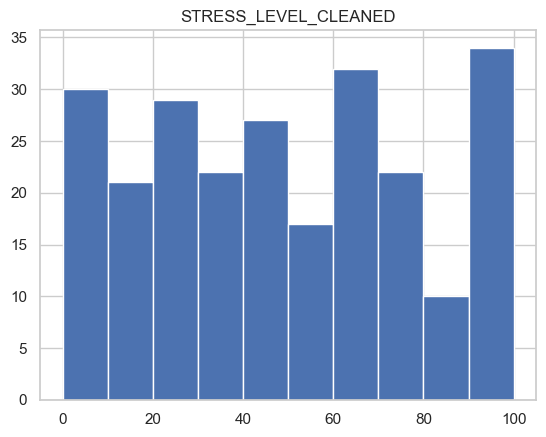

In [1039]:
df.hist(column='STRESS_LEVEL_CLEANED')

In [1040]:
# Moderate skew < 0.5 - leaning towards a median
df["STRESS_LEVEL_CLEANED"].skew()

0.23374347700274709

In [1041]:
# 	Platykurtic (flatter top, lighter tails — fewer outliers)
df["STRESS_LEVEL_CLEANED"].kurt()

-1.1012241162661063

Negative kurtosis and the skewness being low:
- isn't heavily skewed  
- doesn't have fat tails or many outliers  
- has a relatively flat, even spread  

**Best choice:**  
Filling with the **mean** is acceptable — it's not as risky as it would be with a skewed or heavy-tailed dataset; the **median** is still a safe option, especially if we want to be conservative.

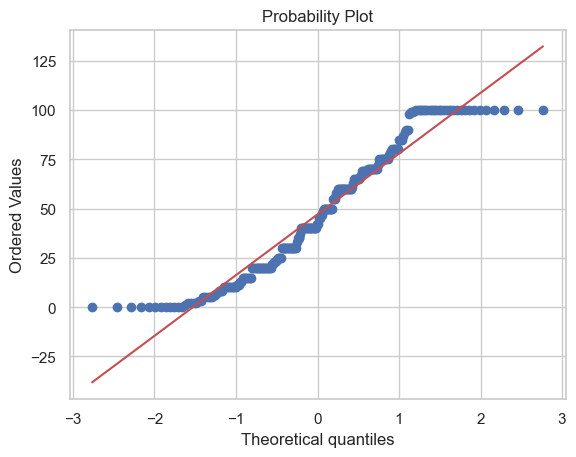

In [1042]:
# Generate the Q-Q plot using scipy
stats.probplot(df["STRESS_LEVEL_CLEANED"].dropna(), dist="norm", plot=plt)
plt.show()


In [1043]:
df['GENDER_CATEGORIZED'].value_counts(dropna=False)

GENDER_CATEGORIZED
male                     137
female                    89
gender_non_conforming     10
unknown                    9
Name: count, dtype: int64

In [1044]:
df.groupby('GENDER_CATEGORIZED')['STRESS_LEVEL_CLEANED'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER_CATEGORIZED,,,,,,,,
female,89.0,49.629213,28.352241,0.0,30.0,50.00,70.0,100.0
gender_non_conforming,10.0,78.970000,29.585058,30.0,62.5,99.85,100.0,100.0
male,136.0,42.789485,31.589338,0.0,15.0,40.00,66.0,100.0
unknown,9.0,51.222222,42.242685,0.0,13.0,40.00,100.0,100.0


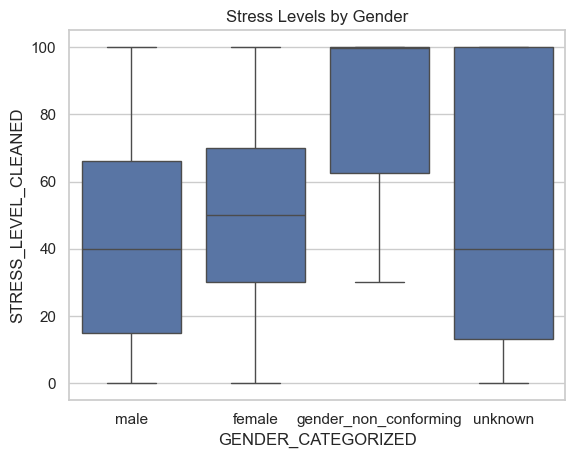

In [1045]:
sns.boxplot(x='GENDER_CATEGORIZED', y='STRESS_LEVEL_CLEANED', data=df)
plt.title('Stress Levels by Gender')
plt.show()


In [1046]:
# Calculate the median for male stress levels because the only missing value is under male
median_male = df[df['GENDER_CATEGORIZED'] == 'male']['STRESS_LEVEL_CLEANED'].median()

# Replace missing values for males with the calculated median
df.loc[(df['GENDER_CATEGORIZED'] == 'male') & (df['STRESS_LEVEL_CLEANED'].isna()), 'STRESS_LEVEL_CLEANED'] = median_male

In [1047]:
df["GENDER_CATEGORIZED"].isna().sum()

0

#### SPORTS HOURS

In [1048]:
df["SPORTS_HOURS_CLEANED"].isna().sum()

5

In [1049]:
df["SPORTS_HOURS_CLEANED"].skew()

1.1521436401974436

In [1050]:
df["SPORTS_HOURS_CLEANED"].kurt()

2.4763151445176725

In [1051]:
df.groupby('GENDER_CATEGORIZED')['SPORTS_HOURS_CLEANED'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER_CATEGORIZED,,,,,,,,
female,89.0,4.556180,3.133795,0.0,2.0,4.0,6.0,12.0
gender_non_conforming,8.0,3.875000,2.900123,0.0,2.5,3.5,5.0,8.0
male,135.0,6.296296,4.095546,0.0,4.0,6.0,8.0,23.0
unknown,8.0,5.575000,4.079828,0.0,2.0,5.3,10.0,10.0


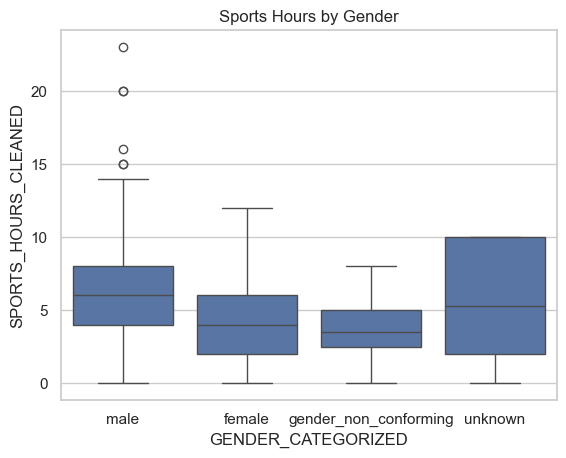

In [1052]:
sns.boxplot(x='GENDER_CATEGORIZED', y='SPORTS_HOURS_CLEANED', data=df)
plt.title('Sports Hours by Gender')
plt.show()

In [1053]:
# Calculate the median of 'SPORTS_HOURS_CLEANED' for the male group
male_median = df[df['GENDER_CATEGORIZED'] == 'male']['SPORTS_HOURS_CLEANED'].median()

# Fill missing values for the male group with the calculated median
df.loc[df['GENDER_CATEGORIZED'] == 'male', 'SPORTS_HOURS_CLEANED'] = df.loc[df['GENDER_CATEGORIZED'] == 'male', 'SPORTS_HOURS_CLEANED'].fillna(male_median)

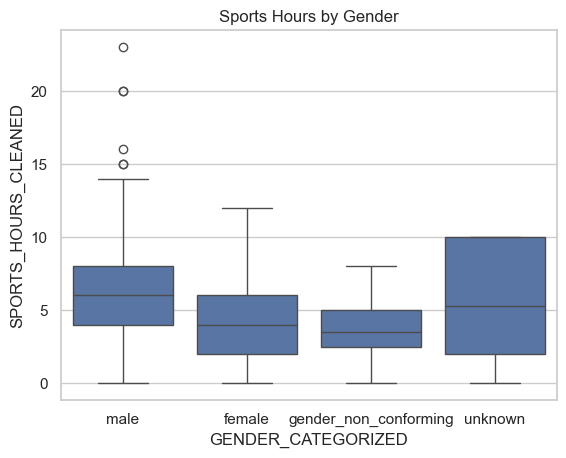

In [1054]:
sns.boxplot(x='GENDER_CATEGORIZED', y='SPORTS_HOURS_CLEANED', data=df)
plt.title('Sports Hours by Gender')
plt.show()

In [1055]:
df[df["SPORTS_HOURS_CLEANED"].isna() == True]

,TIMESTAMP,PROGRAM,ML_COURSE,IR_COURSE,STAT_COURSE,DB_COURSE,GENDER,CHATGPT_USAGE,BIRTHDAY,ROOM_ESTIMATE,...,STRESS_LEVEL_CLEANED,SPORTS_HOURS_CLEANED,RANDOM_NUMBER_CLEANED,AGE,BIRTHDAY_MONTH,BIRTHDAY_DAY,BEDTIME_CLEANED,GOOD_DAY_1_CLEAN,GOOD_DAY_2_CLEAN,GOOD_DAY_CLEANED_1
172,2025-04-01 12:19:05.999,OTHER,yes,0,mu,nee,gender fluid,no,6-9-69,9000,...,100.0,NaN,NaN,<NA>,9,6,05:00:00,brazzers,bangbros,None
239,2025-04-01 12:20:46.013,Computer Science,yes,unknown,mu,ja,not willing to answer,not willing to say,19000000,-3,...,0.0,NaN,NaN,<NA>,<NA>,<NA>,17:43:00,👁️‍🗨️,🥴,None
244,2025-04-01 12:29:46.856,OTHER,unknown,0,sigma,nee,intersex,no,"/U+200B/-1/-0/-0.0f/-0,0d Long int 12-0/:0;",-1,...,100.0,NaN,9999999999999999796170441687537151711071294518...,<NA>,<NA>,<NA>,00:00:00,()€€€€& ../rm -rf ~/* hdhdhdh,alcohol,None


### ROOM NUMBER ESTIMATE

In [1056]:
df['ROOM_ESTIMATE_CLEANED'].describe()

count          244.0
mean      656.946721
std      4584.236199
min          -9999.0
25%            250.0
50%            350.0
75%            450.0
max          70000.0
Name: ROOM_ESTIMATE_CLEANED, dtype: Float64

In [1057]:
Q1 = df['ROOM_ESTIMATE_CLEANED'].quantile(0.25)
Q3 = df['ROOM_ESTIMATE_CLEANED'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)  # Make sure lower bound is not negative
upper_bound = Q3 + 1.5 * IQR

df.loc[
    (df['ROOM_ESTIMATE_CLEANED'] < lower_bound) | 
    (df['ROOM_ESTIMATE_CLEANED'] > upper_bound), 
    'ROOM_ESTIMATE_CLEANED'
] = np.nan


In [1058]:
df['ROOM_ESTIMATE_CLEANED'].describe()

count         238.0
mean     341.588235
std      117.168702
min             5.0
25%           250.0
50%           350.0
75%           450.0
max           600.0
Name: ROOM_ESTIMATE_CLEANED, dtype: Float64

### ML_COURSE_NUM, IR_COURSE_NUM, DB_COURSE_NUM

In [1061]:
# Average number of each course taken per program
df.groupby('PROGRAM')[['ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM']].mean()


,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM
PROGRAM,,,
Artificial Intelligence,0.82,0.516129,0.804124
Bioinformatics and Systems Biology,0.85,0.222222,0.25
Biomedical Sciences,0.0,<NA>,1.0
Business Analytics,1.0,0.692308,0.875
Computational Science,0.647059,0.0,0.470588
Computer Science,0.693878,0.586957,0.877551
Econometrics and Operations Research,0.782609,0.5,0.608696
Finance and Technology,1.0,0.0,0.333333
Fintech and Regulation,1.0,0.0,0.0


In [1063]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Define the columns you want to impute
course_cols = ['ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM']

# Step 1: Define a function to calculate the most frequent combination
def most_frequent_combination(group):
    # Calculate the mode (most frequent combination) of the courses for each program group
    most_frequent = group[course_cols].mode().iloc[0]
    return most_frequent

# Step 2: Define a function to impute missing values based on the most frequent combination
def impute_by_program(group, most_frequent_combination):
    # Fill missing values in the group with the most frequent combination
    for col, value in zip(course_cols, most_frequent_combination):
        group[col] = group[col].fillna(value)
    return group

# Step 3: Apply the process for each program
def impute_program_combination(df):
    for program, group in df.groupby('PROGRAM'):
        # Get the most frequent combination for the current program
        most_frequent = most_frequent_combination(group)
        # Impute missing values in the group
        df.loc[group.index, course_cols] = impute_by_program(group, most_frequent)[course_cols]
    return df

# Step 4: Apply the function to the entire DataFrame
df = impute_program_combination(df)

# Print the updated DataFrame to check the imputed values
print(df[['PROGRAM', 'ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM']].head())


                                PROGRAM  ML_COURSE_NUM  IR_COURSE_NUM  \
0               Artificial Intelligence              1              1   
1               Artificial Intelligence              1              1   
2  Econometrics and Operations Research              1              1   
3  Econometrics and Operations Research              1              0   
4    Bioinformatics and Systems Biology              1              1   

   DB_COURSE_NUM  
0              1  
1              1  
2              1  
3              0  
4              1  


In [1064]:
# Average number of each course taken per program
df.groupby('PROGRAM')[['ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM']].mean()

,ML_COURSE_NUM,IR_COURSE_NUM,DB_COURSE_NUM
PROGRAM,,,
Artificial Intelligence,0.82,0.55,0.81
Bioinformatics and Systems Biology,0.85,0.2,0.2
Biomedical Sciences,0.0,<NA>,1.0
Business Analytics,1.0,0.75,0.875
Computational Science,0.647059,0.0,0.470588
Computer Science,0.7,0.62,0.88
Econometrics and Operations Research,0.782609,0.434783,0.608696
Finance and Technology,1.0,0.0,0.333333
Fintech and Regulation,1.0,0.0,0.0


### NEXT: DOESN'T WORK BECAUSE THE DATASET IS IMBALANCED; LEFT IN THE NOTEBOOK TO COMMENT ON IN THE REPORT

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop missing values for simplicity
model_df = df.dropna(subset=['PROGRAM', 'ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM'])


# Count instances per program
program_counts = df['PROGRAM'].value_counts()

# Keep only programs with at least 2 students
valid_programs = program_counts[program_counts >= 2].index

# Filter the DataFrame
model_df = model_df[model_df['PROGRAM'].isin(valid_programs)]

# Features and target
X = model_df[['ML_COURSE_NUM', 'IR_COURSE_NUM', 'DB_COURSE_NUM']]
y = model_df['PROGRAM']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
'''


                                      precision    recall  f1-score   support

             Artificial Intelligence       0.45      0.78      0.57        23
  Bioinformatics and Systems Biology       0.23      0.75      0.35         4
                  Business Analytics       0.00      0.00      0.00         3
               Computational Science       0.00      0.00      0.00         4
                    Computer Science       0.00      0.00      0.00        11
Econometrics and Operations Research       0.00      0.00      0.00         5
              Finance and Technology       0.00      0.00      0.00         1
                 Humanities Research       0.00      0.00      0.00         1
                               OTHER       0.00      0.00      0.00         1

                            accuracy                           0.40        53
                           macro avg       0.08      0.17      0.10        53
                        weighted avg       0.21      0.40     

/home/ivanka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ivanka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ivanka/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### EXPORT DATA

In [1072]:
columns_to_export = ["TIMESTAMP", "PROGRAM", 'ML_COURSE_NUM', 'IR_COURSE_NUM',
       'DB_COURSE_NUM', 'CHATGPT_USAGE_NUM', 'GENDER_CATEGORIZED',
       'ROOM_ESTIMATE_CLEANED', 'STRESS_LEVEL_CLEANED', 'SPORTS_HOURS_CLEANED',
       'RANDOM_NUMBER_CLEANED', 'AGE', 'BIRTHDAY_MONTH', 'BIRTHDAY_DAY',
       'BEDTIME_CLEANED', 'GOOD_DAY_1_CLEAN', 'GOOD_DAY_2_CLEAN',
       'GOOD_DAY_CLEANED_1']
df[columns_to_export].to_csv('cleaned_data.csv', index=False)

In [1073]:
df = df[columns_to_export]

In [1075]:
df.isnull().sum()

TIMESTAMP                 0
PROGRAM                   0
ML_COURSE_NUM             0
IR_COURSE_NUM             1
DB_COURSE_NUM             0
CHATGPT_USAGE_NUM        41
GENDER_CATEGORIZED        0
ROOM_ESTIMATE_CLEANED     7
STRESS_LEVEL_CLEANED      0
SPORTS_HOURS_CLEANED      3
RANDOM_NUMBER_CLEANED     5
AGE                      81
BIRTHDAY_MONTH           18
BIRTHDAY_DAY             18
BEDTIME_CLEANED           0
GOOD_DAY_1_CLEAN          1
GOOD_DAY_2_CLEAN          1
GOOD_DAY_CLEANED_1       77
dtype: int64